#  Data Preparation

In [24]:
import pandas as pd

# Load your data
file_path = 'lagos.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  lagos  2024-07-10     28.0     25.0  26.0          33.4          25.0   
1  lagos  2024-07-11     26.7     25.3  26.0          26.7          25.3   
2  lagos  2024-07-12     25.9     24.9  25.3          25.9          24.9   
3  lagos  2024-07-13     26.1     24.5  25.2          26.1          24.5   
4  lagos  2024-07-14     26.3     25.0  25.8          26.3          25.0   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       26.6  23.7      87.5  ...         22.5        9          10   
1       26.0  22.7      82.2  ...         17.0        8          10   
2       25.3  22.8      85.8  ...          2.0        1          10   
3       25.2  22.6      85.6  ...          3.5        1          10   
4       25.8  22.5      82.1  ...         21.1        8          10   

               sunrise               sunset  moonphase  \
0  2024-07-10T06:37:47  2024-07-10T19:06:08       0.15   


# Data Cleaning and Preprocessing

#### Convert datetime Column to Datetime Object:

In [25]:
data['datetime'] = pd.to_datetime(data['datetime'])




#### Handle Missing Values:

In [26]:
data['precip'] = data['precip'].fillna(data['precip'].mean())
data['temp'] = data['temp'].fillna(data['temp'].mean())

#### Drop Unnecessary Columns:

In [27]:
data_cleaned = data.drop(columns=['snowdepth', 'stations'])


# Exploratory Data Analysis (EDA)

#### Visualize Key Features:

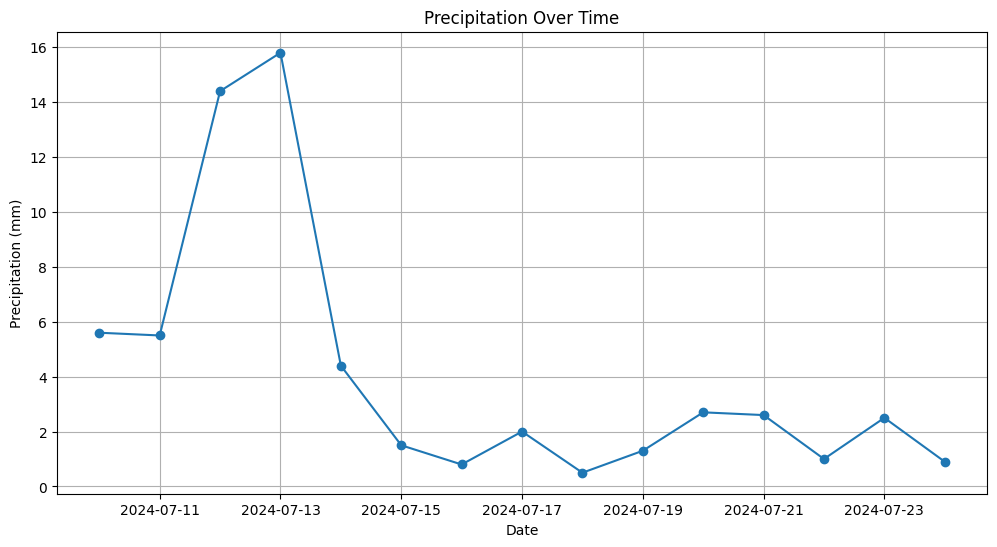

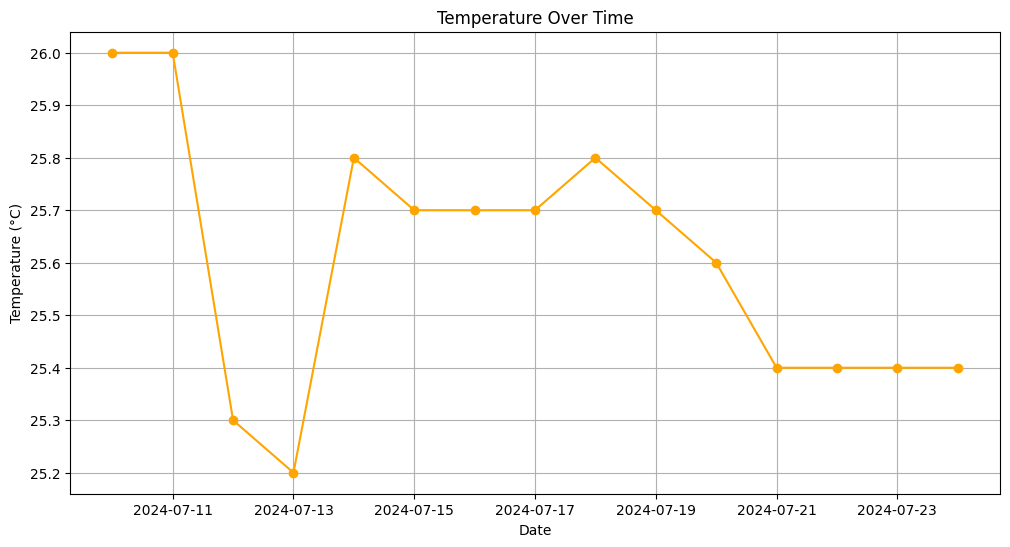

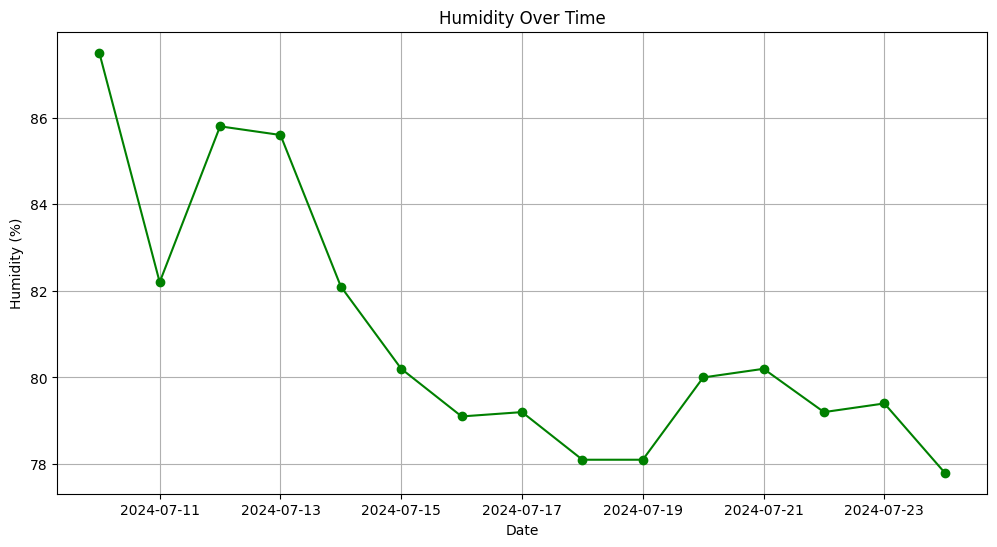

In [28]:
import matplotlib.pyplot as plt

# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['datetime'], data_cleaned['precip'], marker='o')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# Plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['datetime'], data_cleaned['temp'], marker='o', color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['datetime'], data_cleaned['humidity'], marker='o', color='green')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


# Feature Engineering

#### Create Lag Features and Rolling Averages:

In [29]:
# Create lag features for precipitation (1, 3, 7 days)
data_cleaned['precip_lag1'] = data_cleaned['precip'].shift(1)
data_cleaned['precip_lag3'] = data_cleaned['precip'].shift(3)
data_cleaned['precip_lag7'] = data_cleaned['precip'].shift(7)

# Create rolling average features for precipitation (3, 7 days)
data_cleaned['precip_roll3'] = data_cleaned['precip'].rolling(window=3).mean()
data_cleaned['precip_roll7'] = data_cleaned['precip'].rolling(window=7).mean()

# Drop initial NaN values created by shifting/rolling
data_cleaned = data_cleaned.dropna().reset_index(drop=True)

# Display the updated dataframe
print(data_cleaned.head())


    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  lagos 2024-07-17     26.2     25.4  25.7          26.2          25.4   
1  lagos 2024-07-18     26.3     25.2  25.8          26.3          25.2   
2  lagos 2024-07-19     26.0     25.4  25.7          26.0          25.4   
3  lagos 2024-07-20     26.0     25.4  25.6          26.0          25.4   
4  lagos 2024-07-21     26.0     25.0  25.4          26.0          25.0   

   feelslike   dew  humidity  ...               sunset  moonphase  \
0       25.7  21.9      79.2  ...  2024-07-17T19:06:17       0.37   
1       25.8  21.6      78.1  ...  2024-07-18T19:06:16       0.40   
2       25.7  21.6      78.1  ...  2024-07-19T19:06:14       0.44   
3       25.6  21.9      80.0  ...  2024-07-20T19:06:11       0.47   
4       25.4  21.8      80.2  ...  2024-07-21T19:06:07       0.50   

               conditions                                        description  \
0                Overcast                   Cloudy ski

# Modeling 